In [1]:
# Import basic packages 
import pandas as pd
from PIL import Image

In [2]:
from glob import glob

In [3]:
from IPython.display import display

In [26]:
# Set the Correct Directory
import os
print("Current working directory:", os.getcwd())
os.chdir('/Users/sunyao/desktop') 

Current working directory: /Users/sunyao


# Pillow: 
Basic image processing and manipulation
-Open, save, and convert between image formats (JPEG, PNG, etc.)
-Basic manipulations: resize, rotate, crop, flip 
-Color adjustments (brightness, contrast)
-Drawing shapes/text on images
-Simple filters (blur, sharpen)

# OpenCV (cv2):
Computer vision and real-time image processing 
-Edge/feature detection (Canny, SIFT, SURF)
-Object detection (Haar cascades, DNN modules)
-Camera calibration and 3D reconstruction
-Video capture and processing
-Advanced image transformations (warping, perspective)

# Matplotlib
Image visualization and plotting
-High-quality image displays
-Side-by-side comparisons
-Overlaying plots on images
-Color histograms and analysis

# NumPy
Underlying array operations for images
-Images as multi-dimensional arrays (height × width × channels)
-Mathematical operations on pixels
-Masking and advanced indexing
-Integration with other scientific Python libraries

# scikit-image
-Segmentation 
-Mathematical morphology
-Feature extraction
-Restoration and denoising
-Color space transformations

# 1. View Image 

Format: JPEG, Size: (2048, 1024), Mode: RGB


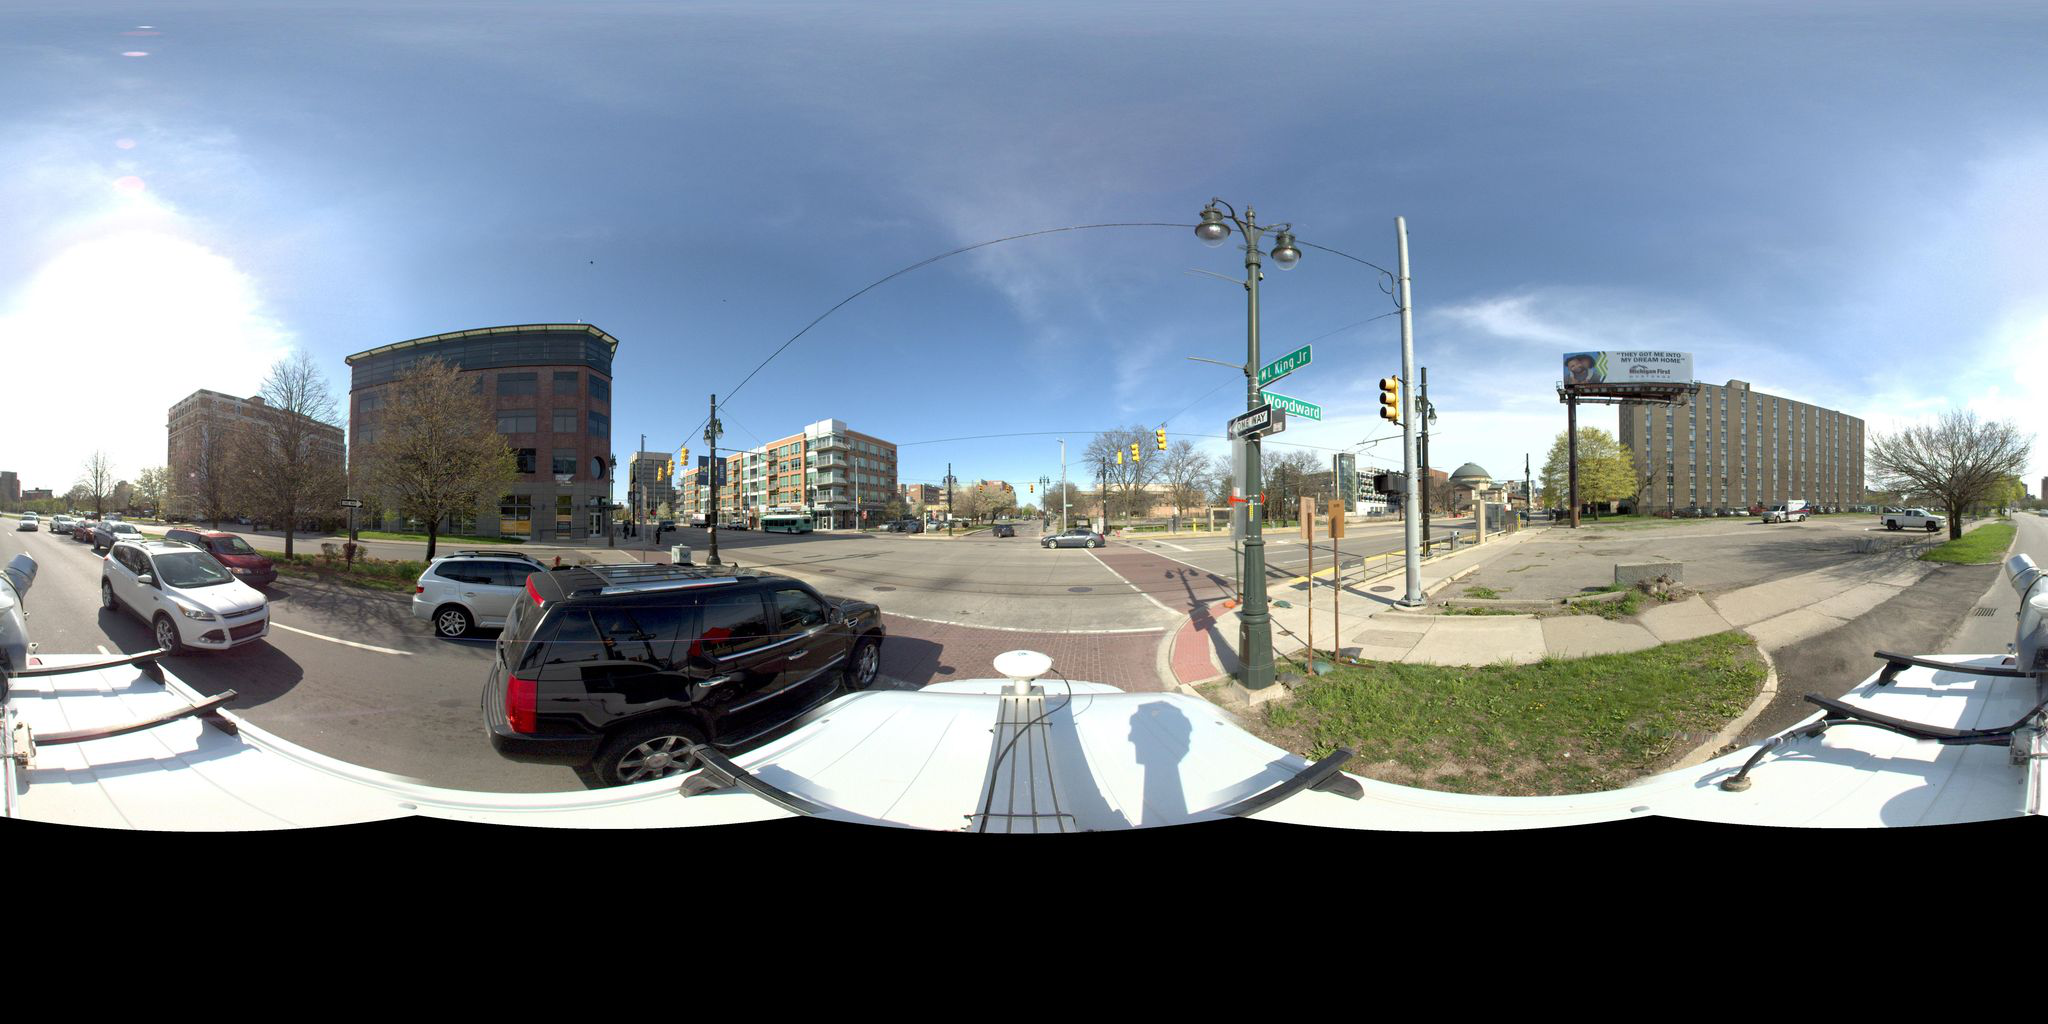

In [4]:
# Open the image
image = Image.open('/Users/sunyao/desktop/MLK-Woodward-3.jpg')

# Display basic info
print(f"Format: {image.format}, Size: {image.size}, Mode: {image.mode}")

# Show the image in the notebook
display(image)

# 2. Load Image using CV2 and Display Image Using Matplotlib 

In [9]:
import matplotlib.pylab as plt

In [8]:
# Can also read in file using matplotlib
img_mpl = plt.imread('/Users/sunyao/desktop/RA data/NIJ Detroit/Code/Pictures/MLK-Woodward-3.jpg')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl) 
ax.axis('off')
plt.show()

In [2]:
import cv2

In [3]:
# read in file using CV2 (preferred due to uint8, working with other CV libraries)
img_cv2 = cv2.imread('/Users/sunyao/desktop/RA data/NIJ Detroit/Code/Pictures/MLK-Woodward-3.jpg')

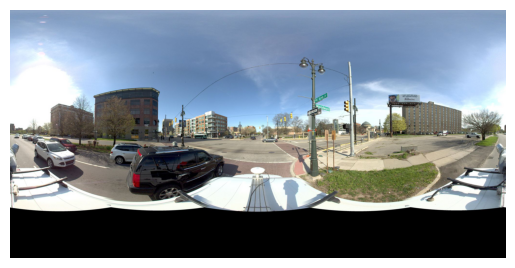

In [23]:
# display image using matplotlib 
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper colors in display
#plt.figure(figsize=(15, 10))  # Make the figure larger
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
#plt.title('MLK Image')
plt.show()

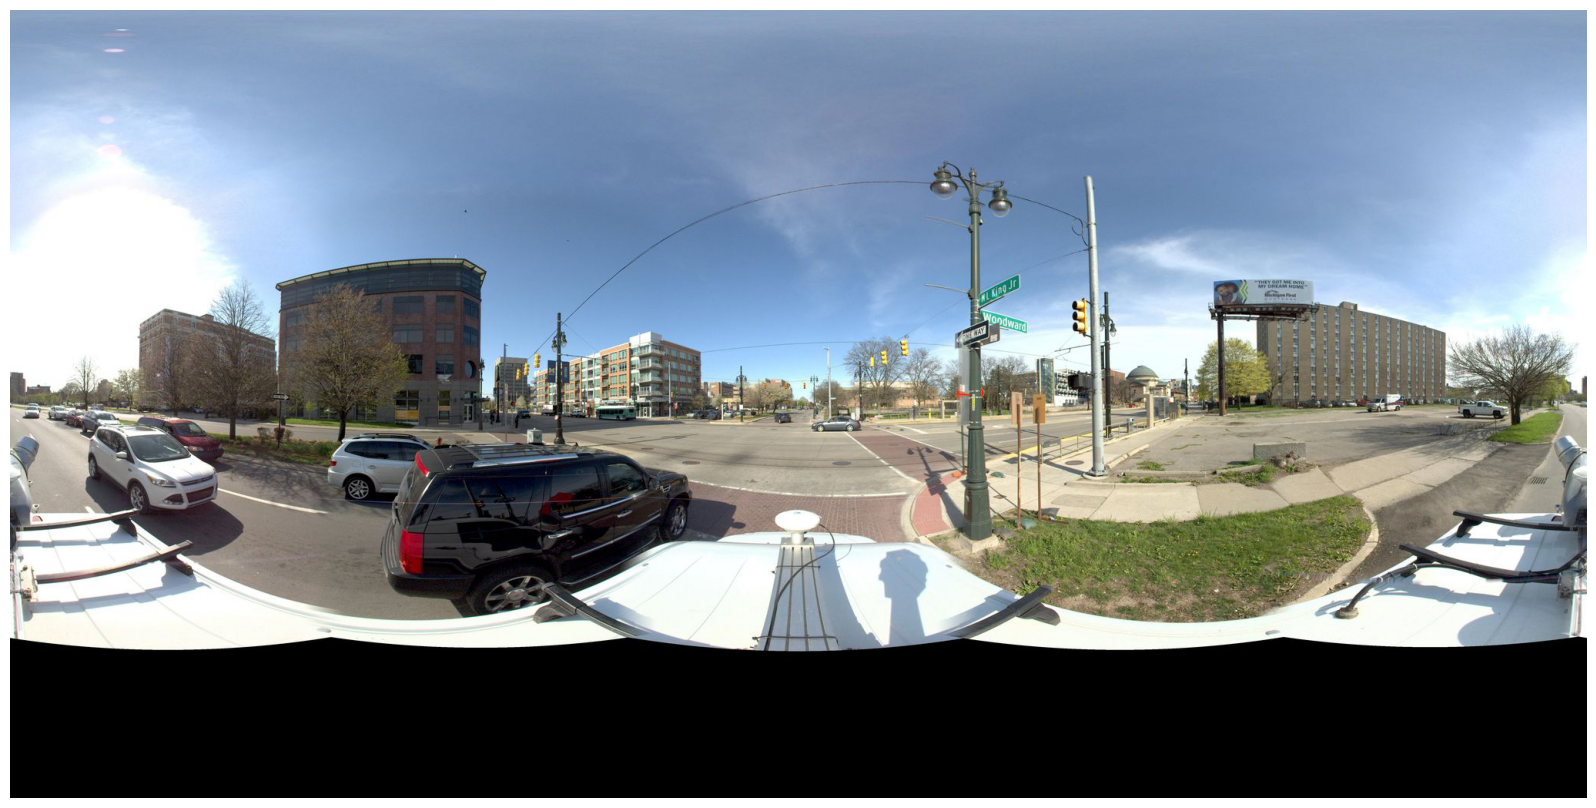

In [14]:
# Match Original Image Size 
# Get original image dimensions
height, width = img_rgb.shape[:2]
fig_width = width / 100  # Adjust this divisor as needed
fig_height = height / 100

plt.figure(figsize=(fig_width, fig_height))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [15]:
# Load using eithercv2 or Mat, both outputs are numpy array

# Check the structure of CV2 output
print(f"Type: {type(img_cv2)}")           # <class 'numpy.ndarray'>
print(f"Shape: {img_cv2.shape}")          # (height, width, channels); this image is #(pixels) width, #tall, with #color channels
print(f"Data type: {img_cv2.dtype}")      # uint8 (0-255 values)
print(f"Total pixels: {img_cv2.size}")    # height × width × channels

Type: <class 'numpy.ndarray'>
Shape: (1024, 2048, 3)
Data type: uint8
Total pixels: 6291456


In [13]:
"""
Note for color channels: 
OpenCV takes image and represents each pixel using three channels (Red, Green, Blue). 
Each channel can have 256 different intensity levels (0-255)
This creates 256³ = 16.7 million possible color combinations. By mixing different amounts of each color channel, it creates many different colors.
"""

'\nNote for color channels: \nOpenCV takes image and represents each pixel using three channels (Red, Green, Blue). \nEach channel can have 256 different intensity levels (0-255)\nThis creates 256³ = 16.7 million possible color combinations. By mixing different amounts of each color channel, it creates many different colors.\n'

# 3. NumPy - Manipulate Image as Arrays; 
It helps with the foundational operations that support object detection, but it's not the main tool for identifying complex objects.

In [17]:
import numpy as np

In [20]:
# Convert image to numpy array
img_array = np.array(img_cv2)

In [21]:
# Check shape (height, width, channels)
print(img_array.shape)

(1024, 2048, 3)


# 4. scikit-image - Advanced Image Processing

In [18]:
from skimage import io, filters, color

# Read image
img = io.imread('/Users/sunyao/desktop/MLK-Woodward-3.jpg')

In [19]:
# Convert to grayscale
gray_img = color.rgb2gray(img)

/var/folders/4k/yp07gyyx6m14v98vq36ynbwc0000gn/T/ipykernel_70251/1966947102.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(edges)
/var/folders/4k/yp07gyyx6m14v98vq36ynbwc0000gn/T/ipykernel_70251/1966947102.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


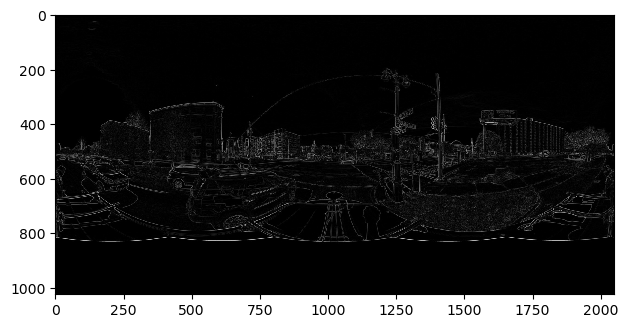

In [20]:
# Edge detection
edges = filters.sobel(gray_img)

# Display
io.imshow(edges)
io.show()

# 5. Batch Loading with OpenCV/PIL

In [29]:
def load_images_opencv(folder_path):
    """Load all images from a folder using OpenCV"""
    images = []
    
    # Get all files in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            # Build full file path
            file_path = os.path.join(folder_path, filename)
            
            # Load image
            img = cv2.imread(file_path)
            
            if img is not None:
                images.append((filename, img))
            else:
                print(f"Failed to load: {filename}")
    
    return images

# Usage:
folder_path = '/Users/sunyao/desktop/RA data/NIJ Detroit/Code/Pictures/'
loaded_images = load_images_opencv(folder_path)

print(f"Loaded {len(loaded_images)} images")

Loaded 7 images


In [30]:
loaded_images = load_images_opencv(folder_path)
# The images are now stored in this variable as a list of tuples
# Each tuple contains: (filename, image_array)

In [32]:
# Get the first image
first_filename, first_image = loaded_images[0]
print(f"First image: {first_filename}")
print(f"Image shape: {first_image.shape}")

# Display the first image
import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)
#plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title(first_filename)
plt.axis('off')
plt.show()

First image: Ford.jpg
Image shape: (1024, 2048, 3)


In [ ]:
# Convert to dictionary for easier access by filename; Dictionary: data structure that stores key-value pairs
image_dict = {filename: image for filename, image in loaded_images}

In [ ]:
# directly access each image by name:

if 'MLK-Woodward-3.jpg' in image_dict:
    my_image = image_dict['MLK-Woodward-3.jpg']
    plt.imshow(cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB))
    plt.show()